# Multivariate Linear Regression Using Gradient Descent

## Attribute Information

### This problem has the following inputs: 
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

### Predicts: 
6. Scaled sound pressure level, in decibels. 
    - ratio of the absolute, Sound Pressure and a reference level (usually the Threshold of Hearing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

num_train_examples = 1502
train_input = np.loadtxt('airfoil_self_noise.dat',float,usecols=(0,1,2,3,4))[0:num_train_examples]
train_output = np.loadtxt('airfoil_self_noise.dat',float,usecols=(5))[0:num_train_examples]

In [2]:
test_input = np.loadtxt('airfoil_self_noise.dat',float,usecols=(0,1,2,3,4))[-1]
test_output = np.loadtxt('airfoil_self_noise.dat',float,usecols=(5))[-1]

In [3]:
# normalize inputs

mean_frq = np.mean(train_input[0:,:1])
mean_ang = np.mean(train_input[0:,1:2])
mean_len = np.mean(train_input[0:,2:3])
mean_vel = np.mean(train_input[0:,3:4])
mean_thk = np.mean(train_input[0:,4:])

frq_std = np.std(train_input[0:,:1])
ang_std = np.std(train_input[0:,1:2])
len_std = np.std(train_input[0:,2:3])
vel_std = np.std(train_input[0:,3:4])
thk_std = np.std(train_input[0:,4:])

train_input[0:,:1] = (train_input[0:,:1]-mean_frq)/frq_std
train_input[0:,1:2] = (train_input[0:,1:2]-mean_ang)/ang_std
train_input[0:,2:3] = (train_input[0:,2:3]-mean_len)/len_std
train_input[0:,3:4] = (train_input[0:,3:4]-mean_vel)/vel_std
train_input[0:,4:] = (train_input[0:,4:]-mean_thk)/thk_std

# normalize test data
test_input = np.array(test_input)
test_input[0] = (test_input[0]-mean_frq)/frq_std
test_input[1] = (test_input[1]-mean_ang)/ang_std
test_input[2] = (test_input[2]-mean_len)/len_std
test_input[3] = (test_input[3]-mean_vel)/vel_std
test_input[4] = (test_input[4]-mean_thk)/thk_std

In [4]:
def update_w_and_b(x,y,w,b,alpha):
    num_examples = x.shape[0]                          
    num_feat = x.shape[1]                             
    
    """
    Gradient Descent: 
        Derivatives of loss function with respect to weights and bias
        Update weights and bias
            
    """
    wgrad = np.zeros((5))
    bgrad = np.zeros((1))
    
    
    for i in range(num_examples):
        wgrad += -x[i,:]*(y[i]-(np.dot(w,x[i,:])+b))/2
        bgrad += -(y[i]-(np.dot(w,x[i,:])+b))/2
        
    w += - (1/float(num_feat))*alpha*wgrad
    b += - (1/float(num_feat))*alpha*bgrad
    return w,b

def hypothesis(x,w,b):
    h = np.dot(x,w)+b
    return(h)
        
def avg_loss(x,y,w,b): 
    m = x.shape[0]
    theta = np.insert(w,0,b)
    x = np.insert(x,0,1.,axis=1)
    hypothesis = np.dot(x,theta)
    return (hypothesis,(1/(2.0*m))*((np.square(hypothesis-y)).sum(axis=0)))

def train(x,y,w,b,alpha,epochs):
    for epoch in range(epochs+1):
        w,b= update_w_and_b(x,y,w,b,alpha)
        if epoch % 10 == 0:
            h,loss = avg_loss(x,y,w,b)
            print('epoch: %s, loss: %s' %(epoch,loss)) 
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.plot(epoch, loss,'bo')
    plt.show()
    return(w,b)

epoch: 0, loss: 7464.125623124243
epoch: 10, loss: 5518.721022935487
epoch: 20, loss: 4081.227784031447
epoch: 30, loss: 3019.024533758133
epoch: 40, loss: 2234.1217143836634
epoch: 50, loss: 1654.117386659547
epoch: 60, loss: 1225.515154721349
epoch: 70, loss: 908.7872100376309
epoch: 80, loss: 674.7266885359106
epoch: 90, loss: 501.75260364730366
epoch: 100, loss: 373.9185752190242
epoch: 110, loss: 279.44155259127547
epoch: 120, loss: 209.61473469529543
epoch: 130, loss: 158.00435571366577
epoch: 140, loss: 119.85620735830267
epoch: 150, loss: 91.65712787340048
epoch: 160, loss: 70.81099096807606
epoch: 170, loss: 55.39929556969917
epoch: 180, loss: 44.00426516234391
epoch: 190, loss: 35.57813431042623
epoch: 200, loss: 29.346562285078033
epoch: 210, loss: 24.737262948719348
epoch: 220, loss: 21.327266896503865
epoch: 230, loss: 18.803951070425956
epoch: 240, loss: 16.936241332804034
epoch: 250, loss: 15.553332050320622
epoch: 260, loss: 14.528960220098648
epoch: 270, loss: 13.76978

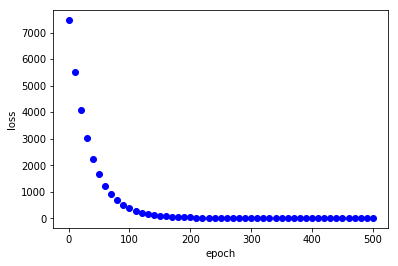

In [5]:
weights = np.zeros(train_input.shape[1])
biases = np.ones((1))
w,b = train(train_input,train_output,weights,biases,0.0001,500)

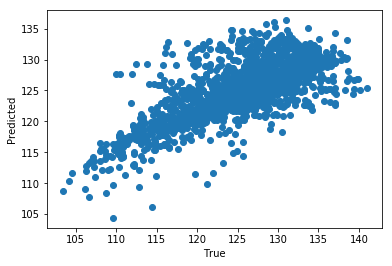

In [6]:
import matplotlib.pyplot as plt

plt.xlabel('True')
plt.ylabel('Predicted')
plt.scatter(train_output, np.dot(train_input,w) + b )
plt.show()